<a href="https://colab.research.google.com/github/quant-IT/Clarusway/blob/main/DL_Assignment_2_(Image_Classification_with_CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
import tensorflow as tf

tf.config.list_physical_devices("GPU")

[]

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")

There are  60000 images in the training dataset
There are  10000 images in the test dataset


In [5]:
# Checking the shape of one image
X_train[5].shape

(28, 28)

In [6]:
X_train[5]

array([[  0,   0,   0,   0,   1,   0,   0,   0,   0,  22,  88, 188, 172,
        132, 125, 141, 199, 143,   9,   0,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,  20, 131, 199, 206, 196, 202, 242,
        255, 255, 250, 222, 197, 206, 188, 126,  17,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,  35, 214, 191, 183, 178, 175, 168, 150,
        162, 159, 152, 158, 179, 183, 189, 195, 185,  82,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 170, 190, 172, 177, 176, 171, 169, 162,
        155, 148, 154, 169, 174, 175, 175, 177, 183, 188,  12,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  25, 194, 180, 178, 174, 184, 187, 189, 187,
        184, 181, 189, 200, 197, 193, 190, 178, 175, 194,  90,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  42, 218, 191, 197, 208, 204, 211, 209, 210,
        212, 211, 214, 215, 213, 214, 211, 211, 191, 200, 158,   0,   0,
          0,   0],
       [  

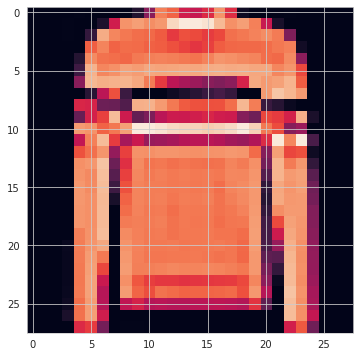

In [7]:
plt.imshow(X_train[5]);
#plt.matshow(X_train[5]);

In [8]:
y_train[5]

2

In [9]:
y_train.shape

(60000,)

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

In [12]:
pd.Series(y_train.flatten()).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [13]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [14]:
y_train[0]

9

In [15]:
classes[int(y_train[0])]

'Ankle boot'

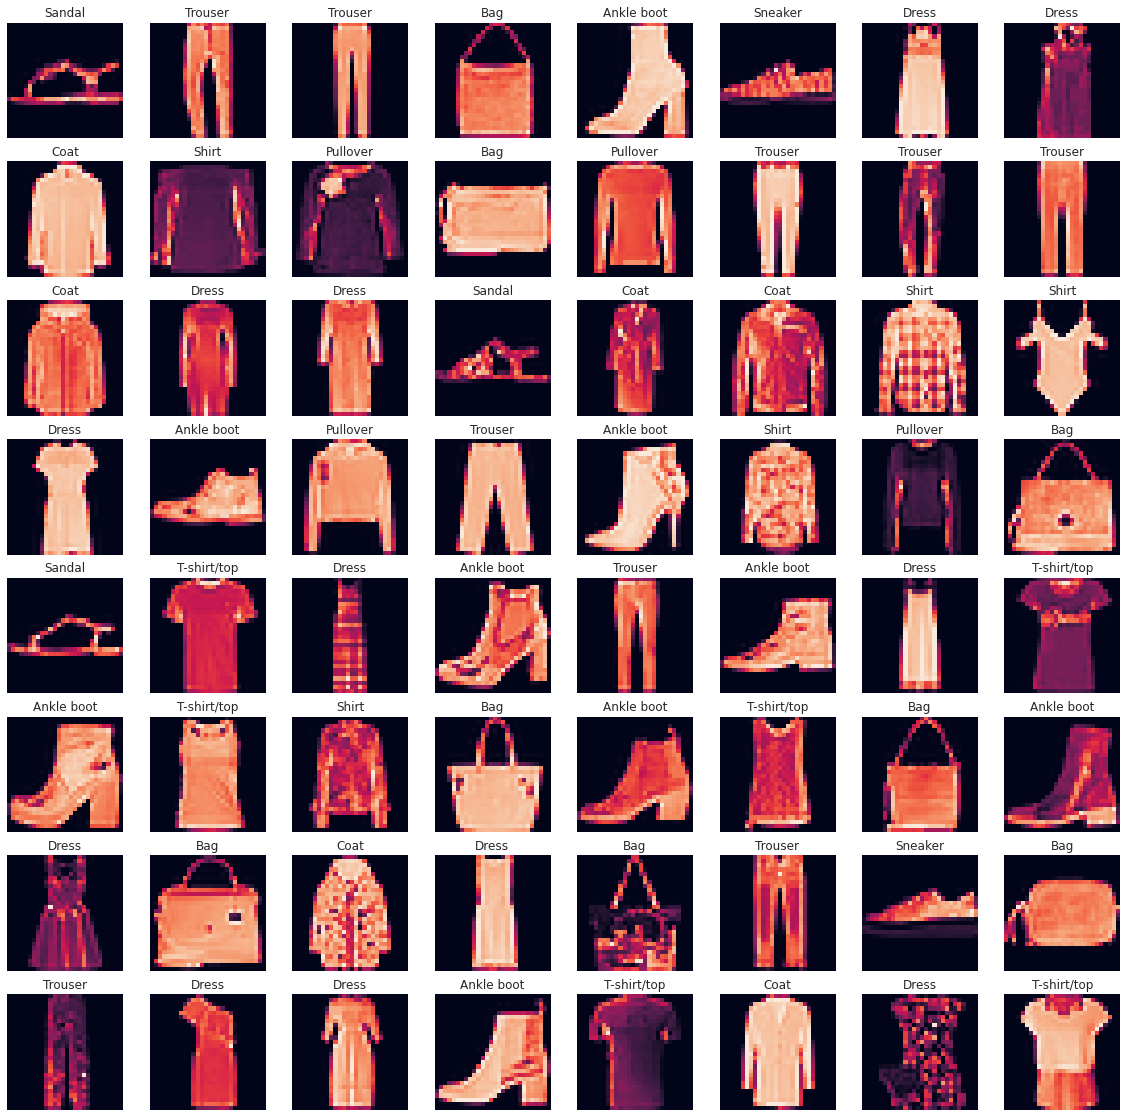

In [16]:
plt.figure(figsize=(20, 20))
for i in range(64):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(8, 8, i+1)
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [17]:
X_train[5].min()

0

In [18]:
X_train[5].max()

255

In [19]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [20]:
X_train[5].min()

0.0

In [21]:
X_train[5].max()

1.0

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

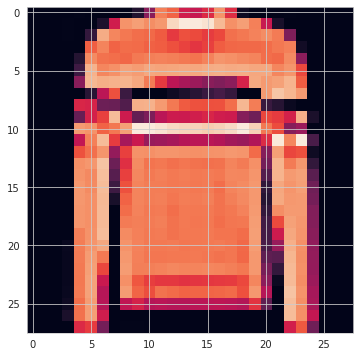

In [22]:
plt.imshow(X_train[5]);

In [23]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [24]:
X_train.reshape(60000, 28, 28, 1).shape

(60000, 28, 28, 1)

In [25]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [26]:
from tensorflow.keras.utils import to_categorical

In [27]:
Y_train = to_categorical(y_train,10) 
Y_test = to_categorical(y_test,10)
Y_test.shape

(10000, 10)

In [28]:
y_train[0]

9

In [29]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [31]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=28, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 28)        7084      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 28)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1372)              0         
                                                                 
 dense (Dense)               (None, 128)               1

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights = True)

In [35]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 65s 34ms/step - loss: 0.4342 - accuracy: 0.8401 - val_loss: 0.3285 - val_accuracy: 0.8802
Epoch 2/50
1875/1875 [==============================] - 62s 33ms/step - loss: 0.2800 - accuracy: 0.8981 - val_loss: 0.2731 - val_accuracy: 0.9014
Epoch 3/50
1875/1875 [==============================] - 64s 34ms/step - loss: 0.2415 - accuracy: 0.9123 - val_loss: 0.2581 - val_accuracy: 0.9064
Epoch 4/50
1875/1875 [==============================] - 63s 34ms/step - loss: 0.2198 - accuracy: 0.9207 - val_loss: 0.3042 - val_accuracy: 0.9008
Epoch 5/50
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2071 - accuracy: 0.9272 - val_loss: 0.3077 - val_accuracy: 0.9045


**TASK 7: Plot values of metrics you used in your model.**

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,0.434,0.840,0.329,0.880
1,0.280,0.898,0.273,0.901
2,0.241,0.912,0.258,0.906
3,0.220,0.921,0.304,0.901
4,0.207,0.927,0.308,0.905


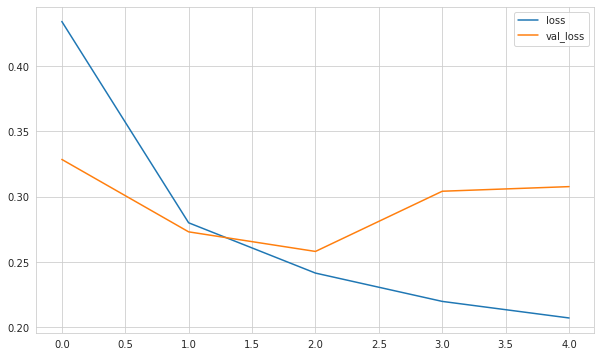

In [38]:
summary[["loss", "val_loss"]].plot();

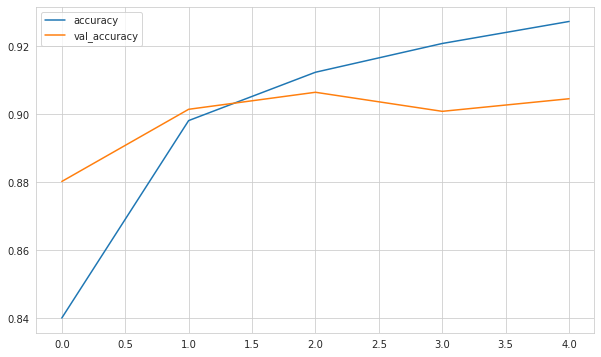

In [39]:
summary[["accuracy", "val_accuracy"]].plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
model.evaluate(X_test,Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.2581 - accuracy: 0.9064


[0.2580651044845581, 0.9064000248908997]

In [42]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2580651044845581
Test accuracy: 0.9064000248908997


In [43]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 3s 10ms/step


array([[1.5292346e-07, 2.0640306e-07, 2.3096137e-08, ..., 8.2968042e-04,
        1.0402465e-06, 9.9891013e-01],
       [3.4484783e-05, 2.6356735e-11, 9.9986601e-01, ..., 3.1864363e-14,
        2.1977800e-09, 3.7317251e-16],
       [5.4238986e-05, 9.9988991e-01, 3.8001221e-07, ..., 3.0881432e-07,
        2.3407802e-06, 8.5491547e-06],
       ...,
       [3.4632208e-07, 2.0585750e-10, 2.1460644e-07, ..., 2.8975177e-07,
        9.9998838e-01, 1.5141202e-08],
       [7.8525602e-07, 9.9998921e-01, 1.2019034e-09, ..., 1.9372883e-09,
        6.5416845e-09, 3.3042562e-07],
       [1.0612166e-03, 1.9970833e-04, 8.0680609e-04, ..., 2.6669604e-01,
        2.1071453e-02, 2.2309745e-02]], dtype=float32)

In [44]:
pred_prob.shape

(10000, 10)

In [45]:
pred_prob[0]

array([1.5292346e-07, 2.0640306e-07, 2.3096137e-08, 5.1407710e-07,
       4.2278621e-08, 2.5616202e-04, 2.0195766e-06, 8.2968042e-04,
       1.0402465e-06, 9.9891013e-01], dtype=float32)

In [46]:
np.argmax(pred_prob[0])

9

In [47]:
y_pred = np.argmax(pred_prob, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [48]:
y_pred.shape

(10000,)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.85      0.85      1000
           3       0.89      0.93      0.91      1000
           4       0.85      0.84      0.85      1000
           5       0.99      0.98      0.98      1000
           6       0.78      0.66      0.72      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [50]:
print(confusion_matrix(y_test, y_pred))

[[908   0  12  20   4   1  48   0   7   0]
 [  0 983   1  13   0   0   1   0   2   0]
 [ 24   1 851  11  59   0  54   0   0   0]
 [ 16   4  11 931  19   0  19   0   0   0]
 [  1   1  61  30 839   0  68   0   0   0]
 [  0   0   0   0   0 977   0  17   0   6]
 [169   2  58  34  61   0 664   0  12   0]
 [  0   0   0   0   0   2   0 960   1  37]
 [  3   1   1   5   2   3   2   2 981   0]
 [  0   0   0   0   0   6   0  23   1 970]]


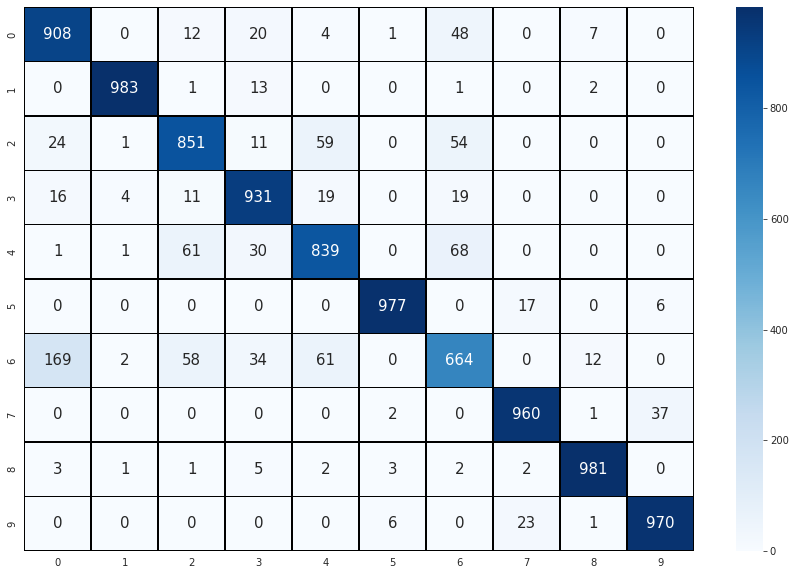

In [51]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", linewidths=.5, linecolor='black', fmt='g', annot_kws = {"size": 15});

In [52]:
y_test != y_pred

array([False, False, False, ..., False, False, False])

In [53]:
(y_test != y_pred).sum()

936

## Prediction

In [65]:
my_image = X_test[99]

In [66]:
my_image.shape

(28, 28)

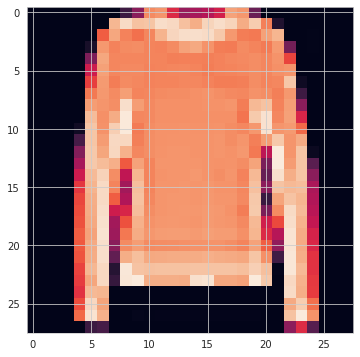

In [67]:
plt.imshow(my_image);

In [68]:
image_prediction = model.predict(my_image.reshape(1,28,28,1))

1/1 [==============================] - 0s 32ms/step


In [69]:
image_prediction

array([[1.1431668e-03, 8.0108506e-08, 9.4835514e-01, 1.3648467e-05,
        5.6087719e-03, 1.1225428e-08, 4.4877343e-02, 1.2641537e-09,
        1.8259531e-06, 2.9155581e-10]], dtype=float32)

In [70]:
np.argmax(image_prediction, axis=1)

array([2])

In [71]:
result=np.argmax(image_prediction, axis=1)

In [72]:
result

array([2])

In [73]:
classes[int(result)]

'Pullover'

In [74]:
model.save("cnn-1.h5")

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___